In [2]:
import vaex
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from os.path import join, abspath
from scipy.stats import poisson
import sys
from os import pardir
from tqdm import tqdm

In [3]:
current = abspath('')
root_dir = abspath(join(current, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [4]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import safe_mkdir, style

style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
spectral_dir = join(root_data_dir, "Color")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Color'

In [8]:
vel_dir = join(root_data_dir, "Velocity-Distribution")
safe_mkdir(vel_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution already exist. Good to go!


In [9]:
files = glob(join(spectral_dir, "gaia*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Color/gaia_(-0.019)_(0.124).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.124)_(0.188).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.188)_(0.219).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.219)_(0.241).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.241)_(0.259).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.259)_(0.275).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.275)_(0.288).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.288)_(0.300).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.300)_(0.312).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.312)_(0.323).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.323)_(0.333).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.333)_(0.343).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.343)_(0.353).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_

In [10]:
index = 0
gaia = vaex.open(files[index])
gaia = gaia.filter("abs(z)<50").filter("rv>-999")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.016132811314469423,0.8453833320993638,6.625999927520752,6.639999866485596,AAA,393289609837293312,26.449678421020508,-24.96840807175537,0.02289041317999363,-8.72720196130603,0.02212526649236679,7.549027097652189,0.02850569225847721,6.791180610656738,6.807115077972412,6.732668399810791,2223.919189453125,1461.660400390625,0.9565751552581787,1.1588934659957886,-1.1377109201305777,-0.23877740044822038,132.62339782714844,132.01100158691406,133.18209838867188,0.18000000715255737,0.17739999294281006,0.18330000340938568,nan,nan,nan,A,00034184+4826128,1,111,--,-1.7445670366287231,gaia,0.21633543074131012,0.21633543074131012,1.0,9896.3720703125,gspphot,26.314453125,29.6044921875,0.0,4.000199794769287,gspphot,0.0028998851776123047,0.0026001930236816406,0.0,nan,--,nan,nan,nan,-1.312999963760376,gspphot,0.025600075721740723,0.044299960136413574,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.013999941749834124,1.0154548490428559,132.46740103913635,-31.33051301020285,128.70901791475563,-26.169521007775085,-3.8394825087166535,0.022863400441453286,0.022153179301464352,0.21633543074131012,-2.4107937163157125,-16.431723978767078,-0.01662394518201199,-0.06368651554562112,-1.9297782652825481,0.05365549699000003,-2.2652585580374547,0.21023430212550667,13.963999868961707,0.10548031529919125,-8.952075564291684,0.19268714834395329,0.43759827627555725,1.9130259992813143
1,0.007327607784865514,1.0824205120699932,7.697999954223633,7.6020002365112305,AAA,429910184639924864,30.434906005859375,-9.994043222039021,0.020594893023371696,-28.747219518666515,0.023014497011899948,6.966705618099453,0.022135332226753235,8.100255966186523,8.185784339904785,7.919078350067139,1736.6217041015625,2342.297607421875,0.9306333661079407,1.1676572561264038,-1.0972707084924957,-0.005097484666529203,144.53489685058594,144.37939453125,144.69949340820312,0.6830000281333923,0.6814000010490417,0.6848999857902527,nan,nan,nan,A,00014076+6201052,1,111,--,-0.45222681760787964,gaia,0.47323763370513916,0.47323763370513916,1.0,11437.2587890625,gspphot,23.1826171875,26.4521484375,0.0,4.480500221252441,gspphot,0.0017004013061523438,0.0020999908447265625,0.0,nan,--,nan,nan,nan,-0.4147999882698059,gspphot,0.009000003337860107,0.0073999762535095215,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.09599969688324964,1.9131372520813543,143.53986730858944,-0.7316891038872795,143.5380024175574,-15.319952150479443,-26.29795802121156,0.020688835232181204,0.022930084781581893,0.47323763370513916,-17.89257761899641,-10.423373280566816,-0.05895195986956449,-0.03598550689191674,-17.890039946715522,0.05900052977702957,-0.5434276872756553,0.4732315807438595,9.028630721199267,0.21816967620486805,-5.236969686521851,0.42147962952468204,0.9184728622378049,2.2590843123486044
2,0.007234878441707054,1.2847693604236983,6.0980000495910645,6.019000053405762,AAA,537612876192148096,77.72052764892578,76.77026583536666,0.027028078213334084,-12.116401093805914,0.030883455649018288,14.336634017840032,0.02442546933889389,6.480009078979492,6.557765960693359,6.310624599456787,1129.3505859375,1816.7000732421875,1.1034117937088013,1.1670989990234375,-1.0580185060772953,0.1934567938988277,69.71549987792969,69.51439666748047,69.94170379638672,0.002300000051036477,0.0005000000237487

In [11]:
gaia["rv_sym"].sum()

array(1006.)

In [12]:
for file in files:
    u = vaex.open(file)
    u = u.filter("abs(z)<50")
    u = u.extract()
    name = file.split("/")[-1]
    print(name, len(u))

gaia_(-0.019)_(0.124).hdf5 1006
gaia_(0.124)_(0.188).hdf5 1014
gaia_(0.188)_(0.219).hdf5 1027
gaia_(0.219)_(0.241).hdf5 1014
gaia_(0.241)_(0.259).hdf5 1033
gaia_(0.259)_(0.275).hdf5 1049
gaia_(0.275)_(0.288).hdf5 1032
gaia_(0.288)_(0.300).hdf5 1038
gaia_(0.300)_(0.312).hdf5 1060
gaia_(0.312)_(0.323).hdf5 1001
gaia_(0.323)_(0.333).hdf5 1007
gaia_(0.333)_(0.343).hdf5 1028
gaia_(0.343)_(0.353).hdf5 1067
gaia_(0.353)_(0.362).hdf5 1044
gaia_(0.362)_(0.376).hdf5 1529


# Stats

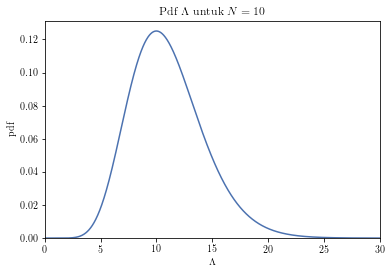

In [13]:
from scipy.stats import poisson

N = 10

x = np.linspace(0, 30, 1000)
y = poisson.pmf(N, x)

plt.plot(x, y)
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"pdf")
plt.ylim(0)
plt.xlim(0, x.max())
plt.title(r"Pdf $\Lambda$ untuk $N=10$")
# plt.savefig(join('img', 'poisson-pdf.pdf'), dpi=70)
plt.show()

# Go

check out high error data

In [14]:
zs = gaia['z'].to_numpy()
ws = gaia['w'].to_numpy()
ews = gaia['e_w'].to_numpy()
p = gaia['parallax'].to_numpy()/1000
e_p = gaia['e_parallax'].to_numpy()/1000
vr = gaia['rv'].to_numpy()
e_vr = gaia['rv_el'].to_numpy()
mub = gaia['pmlat'].to_numpy()/1000
e_mub = gaia['e_pmlat'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

mask = ~np.isnan(ws) & ~np.isnan(ews) 
ws = ws[mask]
ews = ews[mask]


med = np.median(ws)
mad = np.median(np.abs(ws-med))
BIN = 20
wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)
wedge

array([-30.29247903, -27.8986937 , -25.50490838, -23.11112305,
       -20.71733773, -18.32355241, -15.92976708, -13.53598176,
       -11.14219643,  -8.74841111,  -6.35462578,  -3.96084046,
        -1.56705513,   0.82673019,   3.22051551,   5.61430084,
         8.00808616,  10.40187149,  12.79565681,  15.18944214,
        17.58322746])

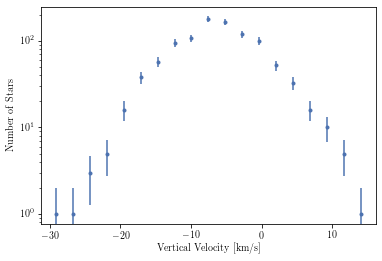

In [15]:
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wnum = wnum[mask]
wmid = wmid[mask]
werr = np.sqrt(wnum)
max = np.max(wnum)
# wnum, werr = wnum/max, werr/max
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.yscale("log")
# plt.axvline(-70)
plt.show()

In [16]:
from hammer import vertical

M = 100_000
# log_w = np.empty(M, dtype=float)
wnum_est = np.empty((M, len(wmid)), dtype=int)
n = len(ws)
mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
mub_realizations = mub_realizations.reshape((n, M)).transpose()
vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
vr_realizations = vr_realizations.reshape((n, M)).transpose()
r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)
# for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(mub_realizations.transpose(), vr_realizations.transpose(), r_realizations)):
for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
    # print(r_realization.shape)
    w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
    wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
    wnum_est[i] = wnum_est_i[mask]
# w_realization

100%|██████████| 100000/100000 [00:13<00:00, 7311.89it/s]


1.1557531491306303 0


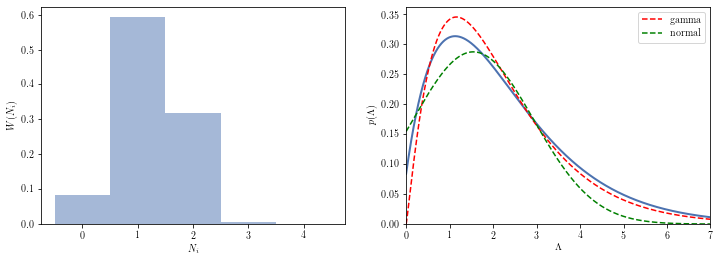

0.46654681566511674 1


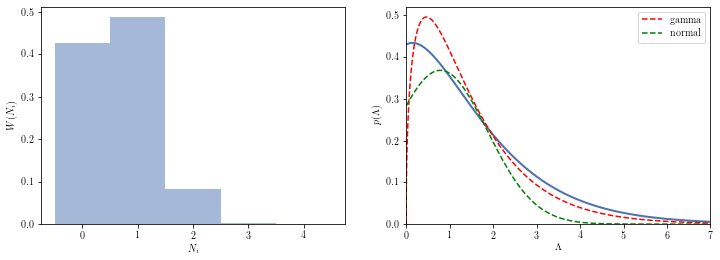

3.1804453613583683 2


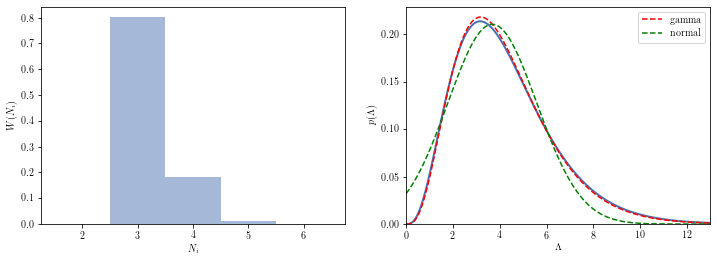

5.20698443138284 3


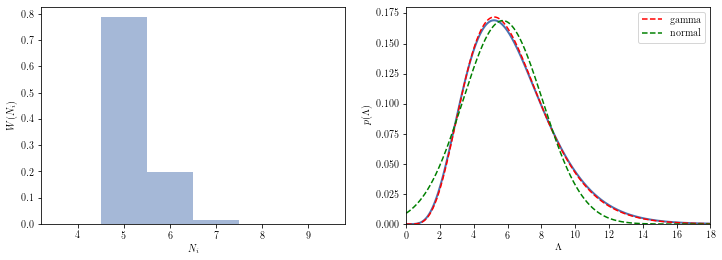

17.21014837248926 4


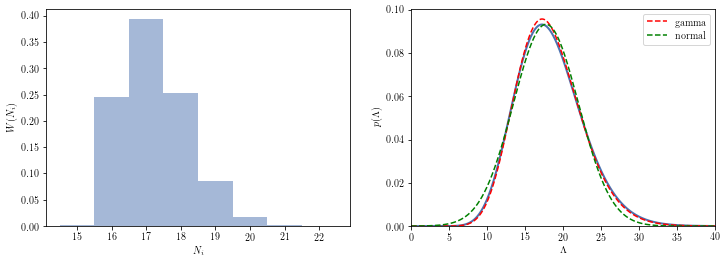

37.71358385233859 5


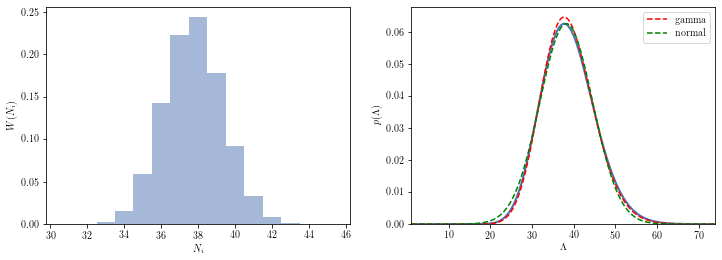

53.48302058697314 6


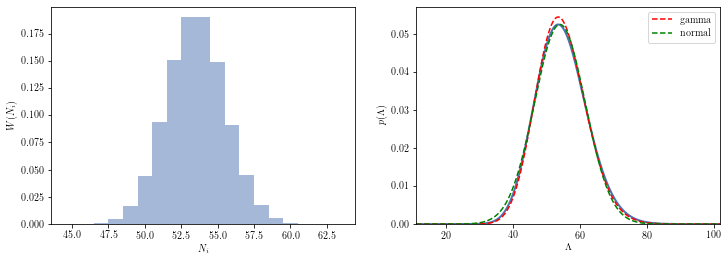

96.55965185636911 7


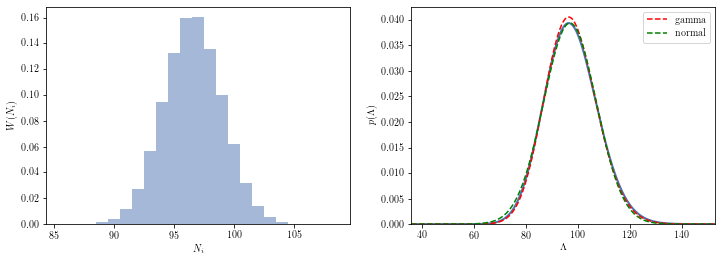

110.712592644214 8


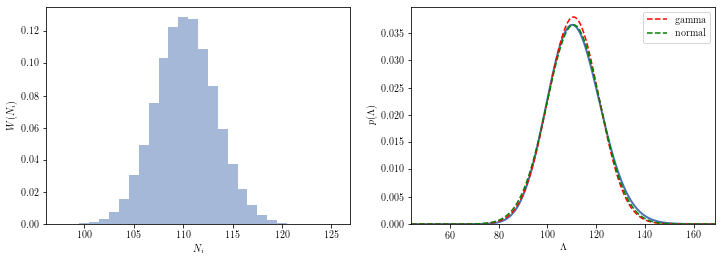

175.1138530638317 9


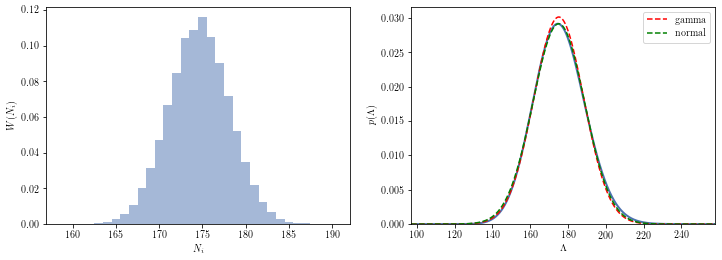

165.91864503283514 10


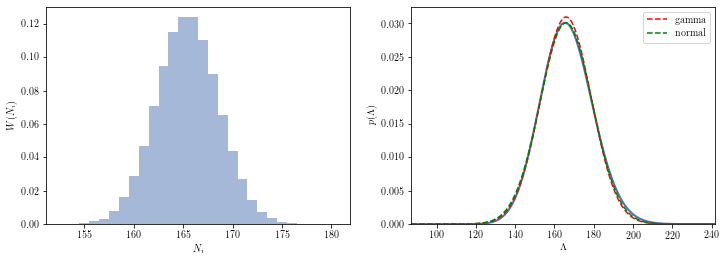

119.4397024514437 11


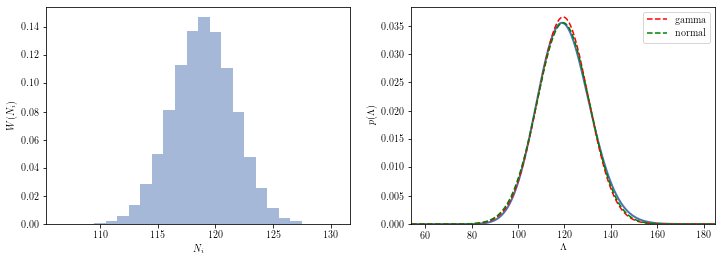

100.0 12


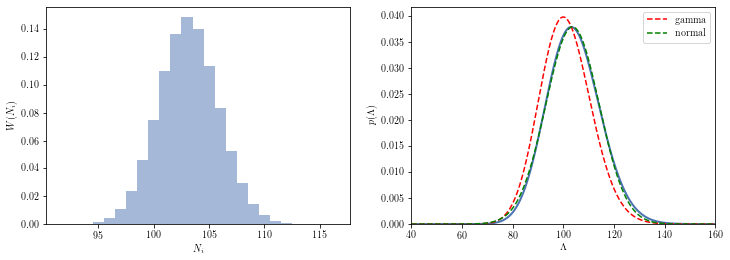

50.32040709790822 13


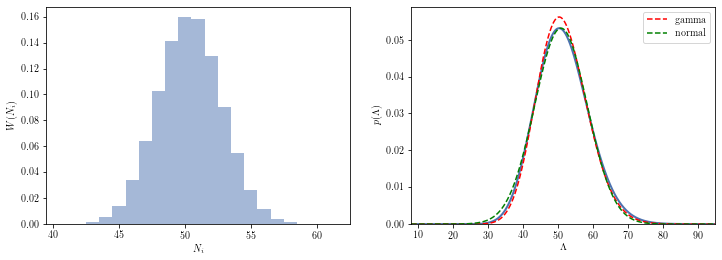

32.77593601801178 14


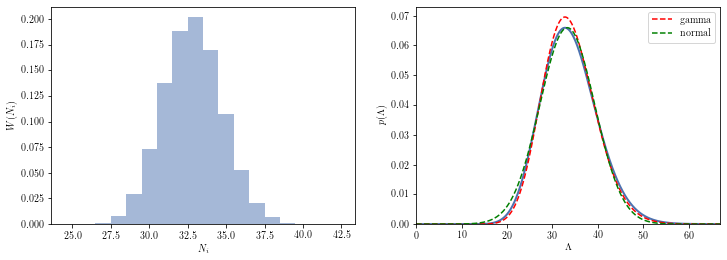

15.530618288220552 15


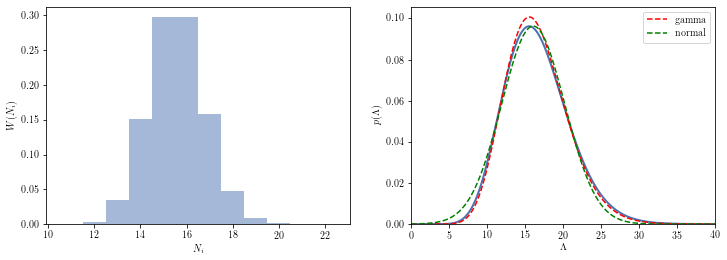

10.44795169983486 16


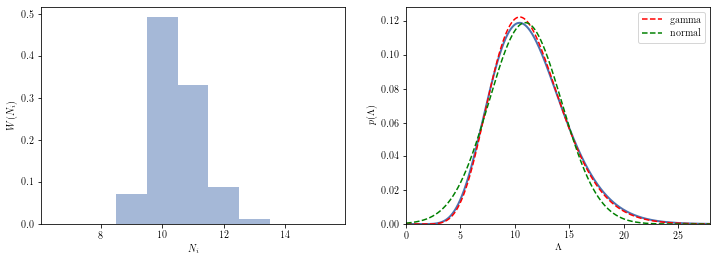

5.0897843562092735 17


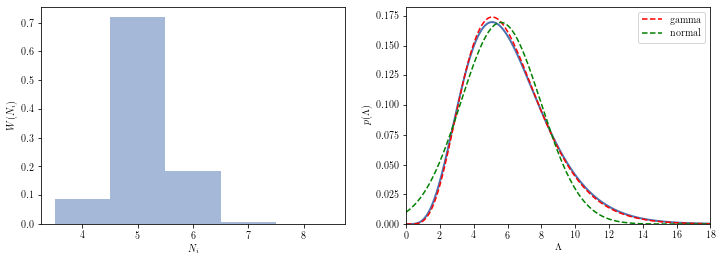

0.7789349766876413 18


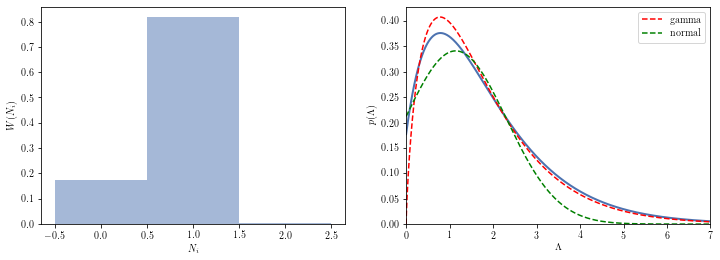

In [17]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

west = np.empty_like(wnum, dtype=float)
for i in range(len(wmid)):
    # if i != 15:
    #     continue
    wnum_est_min = np.floor(wnum_est[:, i].min())
    wnum_est_max = np.ceil(wnum_est[:, i].max())
    bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
    weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)
    wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
    mask = weight > 0
    weight = weight[mask]
    wn_mid = wn_mid[mask]
    m = 6
    west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 10_000)
    dw = west_x[1] - west_x[0]
    pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
    area = np.trapz(pn, west_x)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
    popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
    west[i] = popt_g[0]

    print(popt_g[0], i)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].bar(wn_mid, weight, width=1, alpha=0.5)
    ax[0].set_xlabel(r"$N_i$")
    ax[0].set_ylabel(r"$W(N_i)$")
    ax[1].plot(west_x, pn, c='C0', lw=2)
    ax[1].plot(west_x, p_approx(west_x, *popt_g), label='gamma', ls="--", c='r')
    ax[1].plot(west_x, norm.pdf(west_x, *popt_n), label='normal', ls="--", c='g')
    # ax[1].axvline(wnum[i], c='C3', ls='--', label='asli')
    ax[1].set_xlabel(r"$\Lambda$")
    ax[1].set_ylabel(r"$p(\Lambda)$")
    ax[1].set_ylim(0)
    ax[1].set_xlim(west_x.min(), west_x.max())
    ax[1].legend()
    # fig.savefig(join("img", f"histogram-approx-1.pdf"), dpi=70)
    plt.show()
    
    # break

In [18]:
west

array([  1.15575315,   0.46654682,   3.18044536,   5.20698443,
        17.21014837,  37.71358385,  53.48302059,  96.55965186,
       110.71259264, 175.11385306, 165.91864503, 119.43970245,
       100.        ,  50.3204071 ,  32.77593602,  15.53061829,
        10.4479517 ,   5.08978436,   0.77893498])

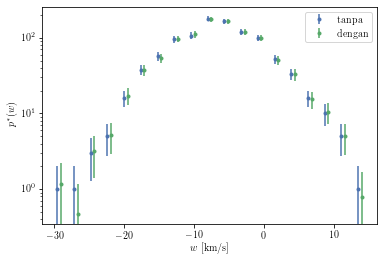

In [19]:
dw = np.min(np.diff(wedge))
plt.errorbar(wmid-0.5, wnum, yerr=werr, fmt='.', label="tanpa")
plt.errorbar(wmid, west, yerr=np.sqrt(west), fmt='.', label="dengan")
plt.xlabel(r"$w$ [km/s]")
plt.ylabel(r"$p^{*}(w)$")
plt.legend()
plt.yscale('log')
# plt.savefig(join("img", f"histogram-w.pdf"), dpi=70)
plt.show()

In [20]:
name = files[index].split("/")[-1].replace("gaia", "w")
df = vaex.from_arrays(mid=wmid, num=west)
df

#,mid,num
0,-29.095586366191945,1.1557531491306303
1,-26.70180104166816,0.46654681566511674
2,-24.30801571714437,3.1804453613583683
3,-21.91423039262058,5.20698443138284
4,-19.52044506809679,17.21014837248926
...,...,...
14,4.417408177141088,32.77593601801178
15,6.811193501664874,15.530618288220552
16,9.204978826188665,10.44795169983486
17,11.598764150712451,5.0897843562092735


In [21]:
name

'w_(-0.019)_(0.124).hdf5'

In [22]:
vel_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution'

In [23]:
# df.export(join(vel_dir, name), progress=True)

# automate finding histogram with error

In [24]:
files

['/home2/s20321005/Thesis-Project/Data/Color/gaia_(-0.019)_(0.124).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.124)_(0.188).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.188)_(0.219).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.219)_(0.241).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.241)_(0.259).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.259)_(0.275).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.275)_(0.288).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.288)_(0.300).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.300)_(0.312).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.312)_(0.323).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.323)_(0.333).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.333)_(0.343).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.343)_(0.353).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_

100%|██████████| 100000/100000 [00:13<00:00, 7231.72it/s]


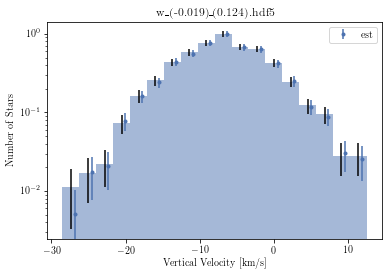

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(-0.019)_(0.124).hdf5


100%|██████████| 100000/100000 [00:13<00:00, 7244.19it/s]


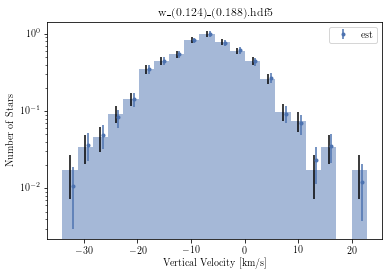

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.124)_(0.188).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7074.15it/s]


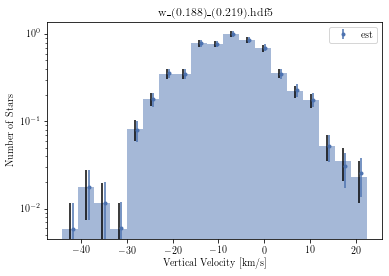

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.188)_(0.219).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7058.63it/s]


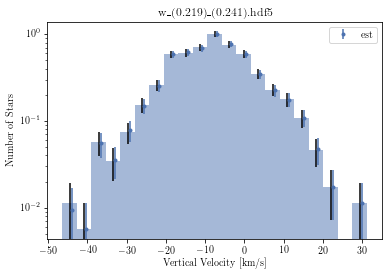

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.219)_(0.241).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 6927.23it/s]


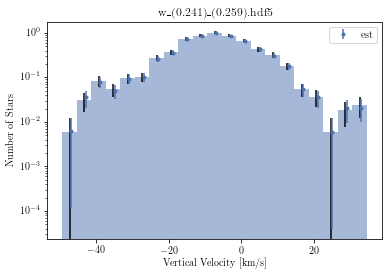

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.241)_(0.259).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 6978.33it/s]


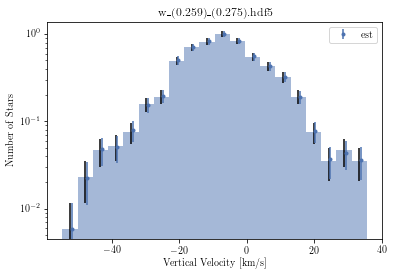

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.259)_(0.275).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 6964.82it/s]


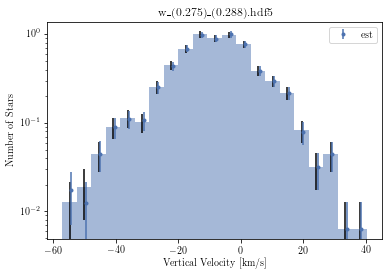

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.275)_(0.288).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 6833.96it/s]


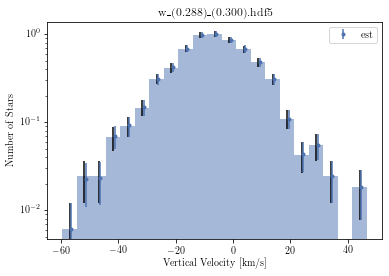

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.288)_(0.300).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 6764.29it/s]


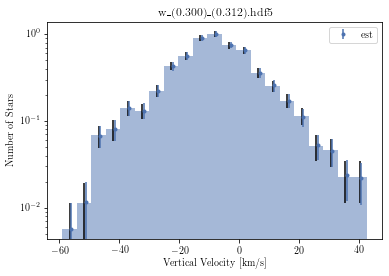

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.300)_(0.312).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7039.76it/s]


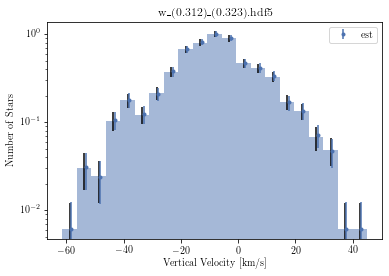

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.312)_(0.323).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7130.97it/s]


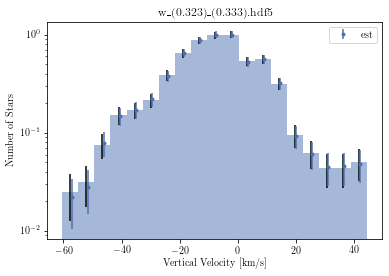

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.323)_(0.333).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7017.22it/s]


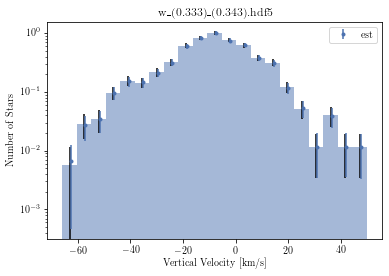

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.333)_(0.343).hdf5


100%|██████████| 100000/100000 [00:15<00:00, 6654.30it/s]


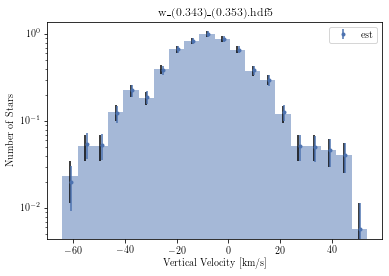

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(0.343)_(0.353).hdf5


100%|██████████| 100000/100000 [00:14<00:00, 7024.66it/s]


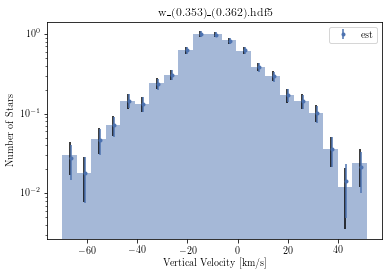

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.353)_(0.362).hdf5


100%|██████████| 100000/100000 [00:19<00:00, 5030.14it/s]


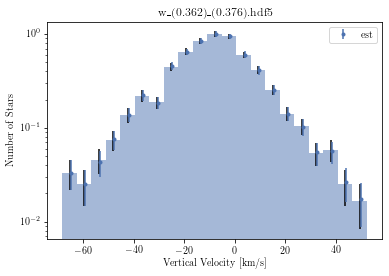

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(0.362)_(0.376).hdf5


In [25]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit
from hammer import vertical

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for file in files:
    gaia = vaex.open(file)
    gaia = gaia.filter("abs(z)<50").filter("rv>-999")
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    ews = gaia['e_w'].to_numpy()
    p = gaia['parallax'].to_numpy()/1000
    e_p = gaia['e_parallax'].to_numpy()/1000
    vr = gaia['rv'].to_numpy()
    e_vr = gaia['rv_el'].to_numpy()
    mub = gaia['pmlat'].to_numpy()/1000
    e_mub = gaia['e_pmlat'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    mask = ~np.isnan(ws) & ~np.isnan(ews)
    ws = ws[mask]
    ews = ews[mask]

    med = np.median(ws)
    mad = np.median(np.abs(ws-med))
    BIN = 21
    wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)

    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = (wnum == 0)
    wnum = wnum[~mask]
    wmid = wmid[~mask]
    werr = np.sqrt(wnum)
    max = np.max(wnum)
    
    M = 100_000
    wnum_est = np.empty((M, len(wmid)), dtype=int)
    n = len(ws)
    mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
    mub_realizations = mub_realizations.reshape((n, M)).transpose()
    vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
    vr_realizations = vr_realizations.reshape((n, M)).transpose()
    r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)

    for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
        w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
        wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
        wnum_est[i] = wnum_est_i[~mask]
    west = np.empty_like(wnum, dtype=float)
    for i in range(len(wmid)):
        wnum_est_min = np.floor(wnum_est[:, i].min())
        wnum_est_max = np.ceil(wnum_est[:, i].max())
        bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
        weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)

        wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
        mask = weight > 0
        weight = weight[mask]
        wn_mid = wn_mid[mask]
        m = 6
        west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 1_000)
        dw = west_x[1] - west_x[0]
        pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
        area = np.trapz(pn, west_x)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
        popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
        west[i] = popt_g[0]
    name = file.split("/")[-1].replace("gaia", "w")
    dw = np.min(np.diff(wedge))
    plt.bar(wmid-0.5, wnum/wnum.max(), yerr=werr/wnum.max(), width=dw, alpha=0.5)
    plt.errorbar(wmid, west/west.max(), yerr=np.sqrt(west)/west.max(), fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.title(name)
    plt.yscale('log')
    plt.show()
    
    
    df = vaex.from_arrays(mid=wmid, num=west)

    df.export(join(vel_dir, name), progress=True)
    print("saved", name) 
    # break